# Observing 

Some exoplanets are easier to observe than others. `exoplanet-atlas` can be used to explore how exoplanet signals compare to the noise potentially achievable by any particular telescope. Let's explore some built-in visualizations for understanding this signal-to-noise comparison.

In [1]:
import exoatlas as ea 
ea.version()

'0.3.2'

## What is observable? 
Let's create a `Population` of all known transiting exoplanets, and one with the eight basic Solar System planets. 

In [2]:
e = ea.TransitingExoplanets()
s = ea.SolarSystem()

Let's use a quick built-in summary to visualize how easy (or difficult) these planets are to observe with different methods. We'll include the Solar System where we reasonably can, for comparison. 

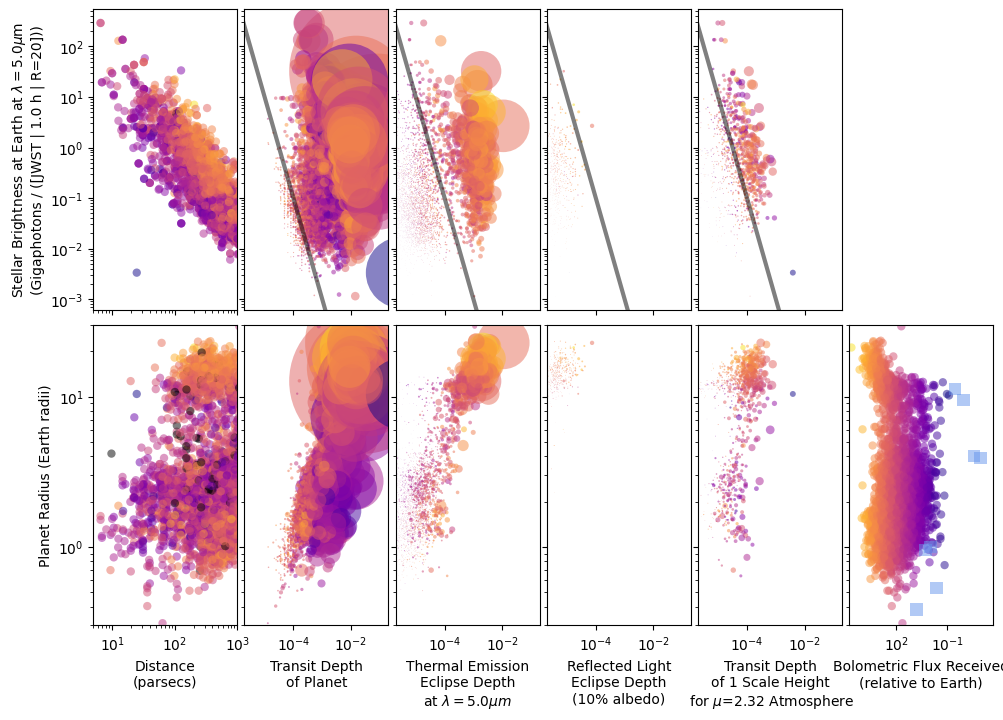

In [3]:
ea.observable_summary([e,s]);

That default `observable_summary` plot shows a lot! 

It defaults to imagining we're observing with a cartoonish telescope with JWST's $\sf 25~m^2$ collecting area, a very approximate $\sf 50%$ efficiency of detecting incoming photons, for a duration of one $\sf 1~hour$, at a spectral resolution of $\sf R = \lambda/\Delta \lambda = 20$, at a wavelength of $\sf \lambda = 5~\mu m$. This might represent (to order of magnitude) a typical observation of a transiting exoplanet with that telescope. 

The vertical axes are shared along each row:
- The top row shows the brightness of the exoplanet host star, which might often be expressed in units like $\sf photons/m^2/s/\mu m$, but here is converted to units of the effective telescope collecting area, the observation duration, and the spectral resolution. Knowing how many photons could be detected while observing a transit is essential for estimating the photon noise floor, meaning the best precision with which we could potentially measure the brightness of the star: if we on average detect $\sf N$ photons, then the precision with which we can measure relative flux changes is $\sf 1/\sqrt{N}$. For example, if we collect $\sf 1~Gigaphoton = 10^9~photons$, then we might hope to measure brightness variations at the level of $\sf 10^{-9/2} = 32~ppm$. In many panels, symbol areas are proportional to the $\sf signal/noise$ ratio, and the diagonal line in the top panel shows where $\sf signal = noise$; planets farther above the line and with bigger dots are easier to observe!

- The bottom row shows the planet radius, which tends to be pretty well known for basically all transiting exoplanets. In very coarse terms, planets close to $\sf 1 R_{\oplus}$ are fairly likely to be mostly rocky, whereas planets closer to $\sf 10 R_{\oplus}$ are almost certainly hydrogen-rich gas giants.



The horizontal axes are shared along each column:
- **Distance** shows the distance from Earth to the system. Other properties being equal, closer systems are brighter! The closest transiting Jupiter-size planets tend to be farther away than the closest transiting Earth-size planets; that's because smaller close-in planets are intrinsically more common and astronomers have done a pretty good job of detecting many nearby transiting planets. 
- **Transit Depth** shows the fraction of starlight blocked when the planet passes in front of its star. This signal is quantified simply as the ratio of the planet's and star's projected areas $$\sf transit~depth \approx \left(\frac{R_p}{R_\star}\right)^2$$  and matters for our ability to detect the mere existence of the planet. Unsurpisingly, JWST has the precision to detect an individual transit for the vast majority of transiting exoplanets!
- **Thermal Emission Eclipse Depth** shows the fraction of total system light that disappears when the thermal emission from the planet itself disappears behind the star, half an orbit away from when it transits. This signal is approximated here as the ratio of the planet's thermal luminosity to that of its star $$\sf thermal~eclipse~depth \approx \left(\frac{R_p}{R_\star}\right)^2 \times \frac{B_\lambda(T_{p})}{B_\lambda(T_{\star})} $$ where we're assuming (!) simple Planck thermal emission spectra $\sf B_\lambda$ for the planet's equilibrium temperature $\sf T_{eq}$ (assuming zero albedo and that incoming stellar radiation gets uniformly redistributed over the planet's sphere). Basically all hot Jupiters are detectable in thermal emission with JWST. 
- **Reflected Light Eclipse Depth** shows the fraction of total system light from the planet's dayside disappears behind the star, half an orbit away from when it transits. This signal is approximated here as the ratio of the planet's reflected luminosity to that of its star $$\sf reflected~eclipse~depth \approx \frac{A_\lambda}{4} \left(\frac{R_p}{R_\star}\right)^2 \left(\frac{R_\star}{a}\right)^2 $$ where $\sf A_\lambda$ is the planet's albedo (assumed here to be $\sf A\lambda = 0.1$) and $\sf a$ is the planet's semimajor axis. Reflected light is hard to detect, even with JWST!
- **Transit Depth of 1 Scale Height** shows the natural scale for transmission spectroscopy, representing the fraction of light blocked by an annulus surrounding the planet's limb with a thickness of one atmospheric scale height. The signal scale is approximated by imagining that across different wavelengths 1 scale height's worth of atmosphere might switch from being totally transparent to totally opaque, so we should care about the ratio of the projected area of the atmospheric annulus to the star's area $$\sf transmission~depth \approx \frac{2R_p H}{R_\star^2}$$ where $\sf H = k_{B}T/\mu mg$ is the atmospheric scale height, with $\sf k_{B}$ as the Boltzmann constant, $\sf T$ as the temperature approximated to be the zero-albedo equilibrium temperature, $\sf m$ as the mean molecular mass of the atmosphere approximated as the mass of 2.3 protons which is reasonable for solar-composition atmosphere, $\sf g$ as the surface gravity estimated from the planet's radius and mass. The assumption of a hydrogen-dominated atmosphere definitely fails for rocky planets with secondary atmospheres and higher mean molecular weights, and the requirement of a surface gravity means that only planets with measured masses and radii can be included on this plot. 
- **Bolometric Flux Received** mostly serves as a colorbar legend. In all panels, planets are colored according to the flux their receive from their stars, which approximately sets their equilibrium temperature. Looking back over the previous columns, it's clear that for most atmosphere observables, hotter planets are easier to observe. There's an interesting trend when comparing planet flux received to stellar brightness: cooler planets tend to have been discovered around cooler stars, so at a fixed distance from Earth the systems hosting cooler planets will tend to be fainter. 

## What about other telescopes? 

We can supply some keyword arguments to `observable_summary` to consider other telescopes besides the beautiful and terrible JWST. For example, let's look at transmission spectroscopy in the optical with the Apache Point Observatory 3.5m telescope:

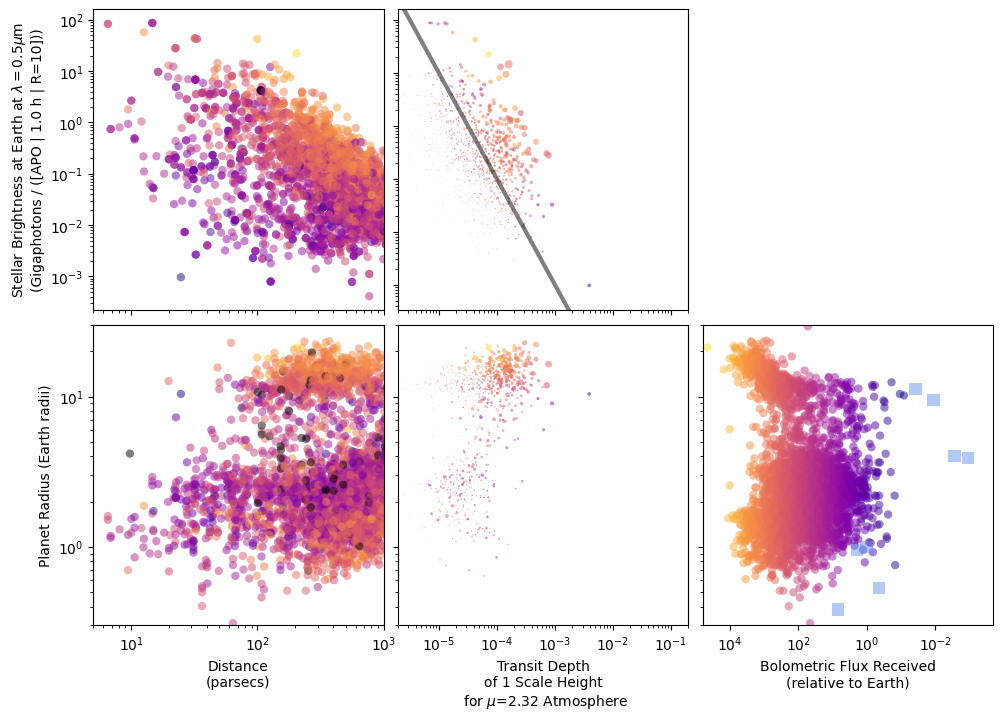

In [4]:
import astropy.units as u
ea.observable_summary([e,s], 
                      telescope_name='APO',
                      wavelength=0.5*u.micron, 
                      efficiency=0.1,
                      R=10,
                      observables=['transmission']);

Plenty of transiting planets exist where the potential size of a transmission spectroscopy signal is, in principle, larger than the photon noise limit expected from APO. The rough noise estimate used here doesn't include contributions from atmospheric scintillation or comparison star, so these might not all actually be observable, but it's good to know it's at least worth exploring!